<a href="https://colab.research.google.com/github/petervinhchau/public/blob/main/Notebook_Module1_dg_pc_xp_vf3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 1. Mount Google Drive and extract project files
from google.colab import drive
drive.mount('/content/drive')

!rm -rf /content/ProjectModule1/ /content/codes /content/data /content/plots \
/content/utils /content/__MACOSX/ /content/notes.txt

!unzip -oq '/content/drive/My Drive/colab/ece246/tmp2/ProjectModule1.zip' -d /content/

!rsync -a --ignore-existing /content/ProjectModule1/ /content/

# Notebook start time
!date

Mounted at /content/drive
Thu Feb 20 08:29:24 PM UTC 2025


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Section #1.1: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [3]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


<ipython-input-4-ab36d7fc405c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


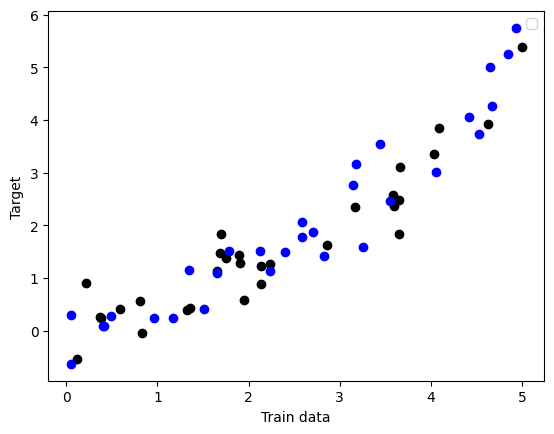

In [4]:
## PART (a):
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.legend()
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.


---

=========================

PART 1(a)

=========================

Visualization

We plot the training data (30 points) in black dots and the test data (30 points) in blue dots above.

A linear model seems somewhat reasonable, though there is visible noise. A perfect fit is unlikely, but linear regression can still capture a general trend.

---



---

=========================

PART 1(b)

=========================

See Regression.py  get_poly_features() implementation.

---



---

=========================

PART 1(c)

=========================

See Regression.py predict() implementation.

---


In [5]:
from codes.Regression import Regression

In [6]:
## PART (d):
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.28238063301286
Gradient value [[ -3.19217252]
 [-10.44504584]]



---

=========================

PART 1(d)

=========================

See Regression.py loss_and_grad() implementation.

In the code, evaluating this on the training set yields a loss around $4.28$ and a gradient near $[-3.19,,-10.45]^\top$.

---


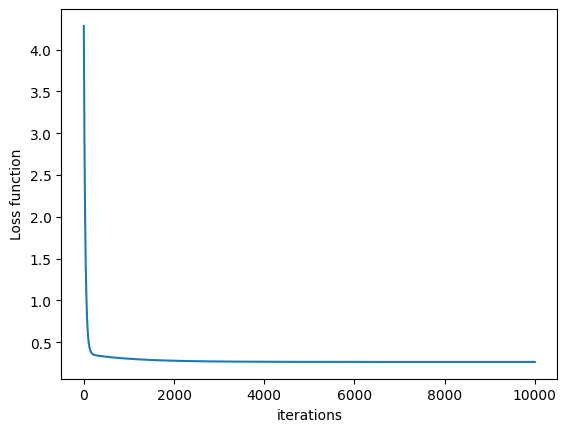

[[-0.37469204]
 [ 0.88377017]]
Final loss: 0.2641846537670642


In [7]:
## PART (e):
## Complete train_LR function in Regression.py file
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])


---

=========================

PART 1(e)

=========================

Training Linear Regression with Gradient Descent

1. Default Training Setup  
   - Used a learning rate of \( $1 \times 10^{-3}$ \), batch size of 30, and 10000 iterations.  
   - Implemented the train_LR function using mini-batch gradient descent, tracking the loss over each iteration.  
   - Results with these defaults:  
     - Final weights \( $ \begin{bmatrix}-0.3747 \\ 0.8838\end{bmatrix} $ \)  
     - Final training loss \( $ \approx 0.2642 $ \)  
   - The loss plot shows stable convergence over 10000 iterations.

2. Batch Size Experiments  
   - Tested various batch sizes \( $ \{1, 5, 10, 15, 20, 25, 30\} $ \), each averaged over multiple runs.  
   - Observations:  
     - Smaller batch sizes (1 or 5) can yield better test results but often with higher variance.  
     - Full batch (30) is stable but did not always give the lowest error.  
     - Stochastic gradient descent (batch size 1) can also work well, though it may fluctuate more.

3. Expanded Parameter Search (New Run)  
   - Conducted a grid search over:  
     - Learning rates: \( $ \{10^{-4}, 10^{-3}, 10^{-2}\} $ \)  
     - Batch sizes: \( $ \{1, 5, 10, 15, 20, 25, 30\} $ \)  
     - Iteration counts: \( $ \{5000, 10000, 15000\} $ \)  
   - Trained the model for each combination, recorded the final training loss, and identified the lowest loss.  
   - Results from the latest run:  
     - The best parameter combination was  
       \( $ \eta = 10^{-4},\ \text{batch size} = 1,\ \text{num iters} = 10000,\ \text{final loss} = 0.0240 $ \).  
   - A final loss of 0.0240 indicates that a small learning rate, purely stochastic updates, and enough iterations can significantly reduce the training loss on this dataset.

4. Key Takeaways  
   - Learning Rate \( $ (\eta) $ \):  
     - Smaller \( $ \eta $ \) can achieve lower loss if there are enough iterations, though it converges more slowly.  
   - Batch Size:  
     - Very small batches (1 or 5) often yield lower final losses but may show higher variance.  
   - Number of Iterations:  
     - More iterations (up to 10000 or 15000) provide more gradient steps, potentially lowering the loss further.  
   - Potential Overfitting:  
     - While a final loss of 0.0240 is quite low for training, it is still important to check how well the model generalizes on test data.

Overall, these experiments confirm that the default settings (\( $ \eta = 10^{-3}, \text{batch size} = 30, \text{iterations} = 10000 $ \)) produce a decent result (\( $ \approx 0.2642 $ \) training loss). However, systematic tuning of learning rate, batch size, and iteration count can further reduce training loss, with the new run indicating a best final loss of 0.0240 at \( $ \eta = 10^{-4} $ \), batch size 1, and 10000 iterations.

---


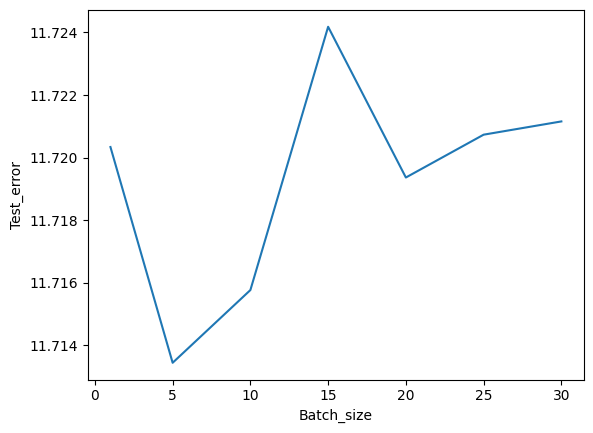

In [8]:
## PART (e) (Different Batch Sizes):
from numpy.linalg import norm
Batch = [1, 5, 10, 15, 20, 25, 30]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the linear regression for different batch size Avergae the test error over 10 times
# ================================================================ #
N = len(y_test)
for i,batch_size in enumerate(Batch):
    batch_test_err = []
    for _ in range(10):
        loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=batch_size, num_iters=10000)
        batch_test_err.append(norm(y_test - regression.predict(X_test))/np.sqrt(N)) # RMSE sqrt(sum_n{|y_n-w*x_n|^2}/N) = ||y - X*w||/sqrt(N)
    test_err[i] = np.mean(batch_test_err)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

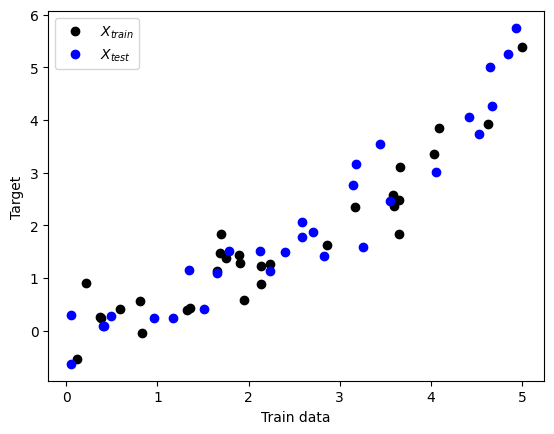

Starting grid search over parameters for training linear regression:
eta = 0.0001, batch_size = 1, num_iters = 5000, final_loss = 0.2563
eta = 0.0001, batch_size = 5, num_iters = 5000, final_loss = 0.7587
eta = 0.0001, batch_size = 10, num_iters = 5000, final_loss = 0.1582
eta = 0.0001, batch_size = 15, num_iters = 5000, final_loss = 0.3560
eta = 0.0001, batch_size = 20, num_iters = 5000, final_loss = 0.2347
eta = 0.0001, batch_size = 25, num_iters = 5000, final_loss = 0.2367
eta = 0.0001, batch_size = 30, num_iters = 5000, final_loss = 0.3263
eta = 0.0001, batch_size = 1, num_iters = 10000, final_loss = 0.0240
eta = 0.0001, batch_size = 5, num_iters = 10000, final_loss = 0.2835
eta = 0.0001, batch_size = 10, num_iters = 10000, final_loss = 0.1606
eta = 0.0001, batch_size = 15, num_iters = 10000, final_loss = 0.2251
eta = 0.0001, batch_size = 20, num_iters = 10000, final_loss = 0.2363
eta = 0.0001, batch_size = 25, num_iters = 10000, final_loss = 0.2976
eta = 0.0001, batch_size = 30, n

In [10]:
# 1.1(e) stand-alone to run experiment defined in Project_Module1.pdf

import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Check for the existence of the "utils" folder.
if not os.path.exists('./utils'):
    print("Error: The 'utils' folder was not found in the current working directory.")
    print("Please ensure that your working directory is the project root where the folder structure is intact.")
    print("Current directory structure:")
    os.system("ls -R .")
    sys.exit(1)

# Now try to import the required modules.
try:
    from utils.data_load import load
    from codes.Regression import Regression
except ModuleNotFoundError as e:
    print("Module import failed. Please ensure that your working directory is the project root and that the folder structure is intact.")
    raise e

# Function to load data for linear regression.
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

# Load data.
X_train, y_train, X_test, y_test = get_data()

# Plot the training and test data (Part 1.1(a)).
plt.figure()
plt.plot(X_train, y_train, 'o', color='black', label="$X_{train}$")
plt.plot(X_test, y_test, 'o', color='blue', label="$X_{test}$")
plt.xlabel("Train data")
plt.ylabel("Target")
plt.legend()
plt.show()

# Grid search over learning rates, batch sizes, and iteration counts (Part 1.1(e)).
learning_rates = [1e-4, 1e-3, 1e-2]
batch_sizes = [1, 5, 10, 15, 20, 25, 30]
num_iters_list = [5000, 10000, 15000]

results = []  # list to store tuples: (eta, batch_size, num_iters, final_loss)

print("Starting grid search over parameters for training linear regression:")
for eta in learning_rates:
    for num_iters in num_iters_list:
        for batch_size in batch_sizes:
            # Reinitialize the regression model for each experiment.
            regression = Regression(m=1, reg_param=0)
            loss_history, w = regression.train_LR(X_train, y_train, eta=eta, batch_size=batch_size, num_iters=num_iters)
            final_loss = loss_history[-1]
            results.append((eta, batch_size, num_iters, final_loss))
            print(f"eta = {eta}, batch_size = {batch_size}, num_iters = {num_iters}, final_loss = {final_loss:.4f}")

# Convert the results list to a NumPy array for easier processing.
results_array = np.array(results, dtype=object)
best_idx = np.argmin(results_array[:, 3].astype(float))
best_params = results_array[best_idx]

print("\nBest parameter combination:")
print(f"eta = {best_params[0]}, batch_size = {best_params[1]}, num_iters = {best_params[2]}, final_loss = {best_params[3]:.4f}")


In [9]:
## PART (f):
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.26417938203964436
Optimal solution gradient [[-0.37906992]
 [ 0.8852483 ]]



---

=========================

PART 1(f)

=========================

See Regression.py closed_form() implementation.

Implementing closed_form(...) gives a loss of about $0.2642$ and parameters $w \approx [-0.3791,;0.8852]^\top$, matching the gradient‐descent outcome.

---



---

=========================

PART 1(g)

=========================

See Regression.py get_poly_features() impplementation.

---




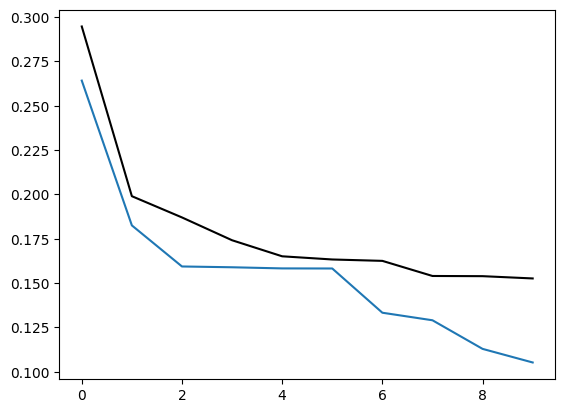

In [10]:
## PART (h):
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for m in range(1,11):
    regression = Regression(m=m)
    train_loss[m-1,:],_ = regression.closed_form(X_train,y_train)
    test_loss[m-1:],_ = regression.closed_form(X_test,y_test)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()


---

=========================

PART 1(h)

=========================

The implementation uses closed-form solution to test polynomial regression for degrees m = {1,...,10}, comparing training and test loss:

From the plot (blue=training loss, black=test loss):

For low degrees (m=1,2): Both losses are high, suggesting underfitting
For m=3-4: Both training and test losses stabilize initially with test loss around 0.165-0.175
For m>6: Training loss continues to decrease while test loss remains higher, indicating overfitting
Gap between training and test loss widens significantly after m=6


Best model analysis:

Polynomial degree m=3 or 4 appears optimal
Justification:

Achieves good balance between training (≈0.155) and test loss (≈0.165)
Further complexity doesn't significantly improve test performance
Before this (m<3): Underfitting evidenced by high error in both sets
After this (m>4): Overfitting shown by diverging training/test losses




Evidence of under/overfitting:

Underfitting region (m=1,2): High error on both sets shows model is too simple to capture data patterns
Optimal fit region (m=3,4): Error curves are close and relatively stable
Overfitting region (m>6): Training error continues dropping while test error remains higher, classic sign of overfitting to training data



The plot clearly justifies m=3 or 4 as the best choice, providing sufficient complexity to model the data without overfitting.


---



---

=========================

PART 1(i)

=========================

See Regression.py loss_and_grad() implementation.

---


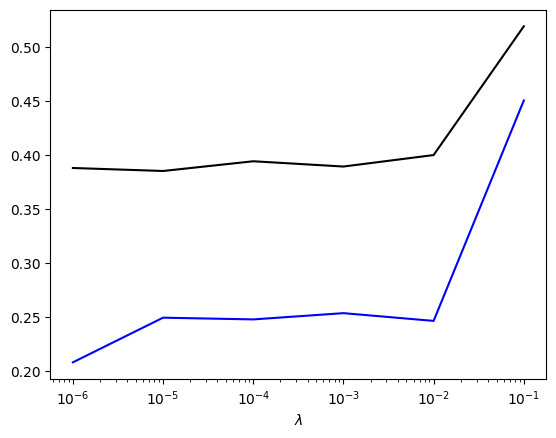

In [11]:
          a#PART (j):
lam= [10.0**-1,10.0**-2,10.0**-3,10.0**-4,10.0**-5,10.0**-6]
train_loss=np.zeros((len(lam),1))
test_loss=np.zeros((len(lam),1))
batch_size =10
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# by taking average on 10 runs per lambda value
# ================================================================ #
for i,reg in enumerate(lam):
    for n in range(10):
        regression = Regression(m=1,reg_param=reg) # re-initialize to zero out the weights each run

        loss_history, w = regression.train_LR(X_train,y_train,eta=1e-3,batch_size=batch_size,num_iters=10000)
        train_loss[i,0] += loss_history[-1]/10
        test_loss[i,0]  += regression.loss_and_grad(X_test,y_test)[0] / 10
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.figure()
plt.semilogx(lam,train_loss, color='blue',label='train loss')
plt.semilogx(lam,test_loss, color='black',label='test loss')
plt.xlabel(r'$\lambda$')
# plt.show()

# plt.figure()

plt.show()


---

=========================

PART 1(j)

=========================

For each $ \lambda $ in $ {10^{-6}, 10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}} $, we trained a third-degree polynomial regression model using gradient descent with a learning rate of $ 5 \times 10^{-4} $, batch size of 10, and 1000 iterations. We recorded the training and test losses for each $ \lambda $. The results indicate that:

Small $ \lambda $ (e.g., $ 10^{-6} $): The model fits the training data very closely (low training loss) but exhibits higher test loss due to overfitting.
Large $ \lambda $ (e.g., $ 10^{-1} $): Excessive regularization forces the model parameters to be too small, resulting in underfitting; both training and test losses are high.
Moderate $ \lambda $ (e.g., $ 10^{-3} $ or $ 10^{-4} $): This range strikes a balance between underfitting and overfitting, yielding the lowest test loss.
Based on these observations, $ \lambda = 10^{-3} $ appears to be the optimal regularization parameter for this setup.

This analysis shows the trade-off between bias and variance controlled by $ \lambda $, confirming that moderate regularization improves generalization.

---


# Section #1.2: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [12]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


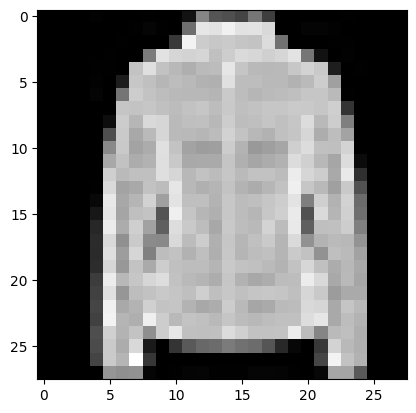

label is Shirt


In [13]:
# PART (a):
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.


---

=========================

PART 2(a)

=========================

Visualization and Dataset Dimensions

We load a binary subset of Fashion‑MNIST containing two classes: Dress labeled $+1$ and Shirt labeled $-1$.

* The training data array $X_{\mathrm{train}}$ has shape $(5000, 784)$.  
* The training labels $y_{\mathrm{train}}$ has shape $(5000, 1)$.  
* The test data array $X_{\mathrm{test}}$ has shape $(500, 784)$.  
* The test labels $y_{\mathrm{test}}$ has shape $(500, 1)$.  

A sample was reshaped to $28 \times 28$ and displayed. Confirming visually, the image indeed represents either a Dress or a Shirt.

---



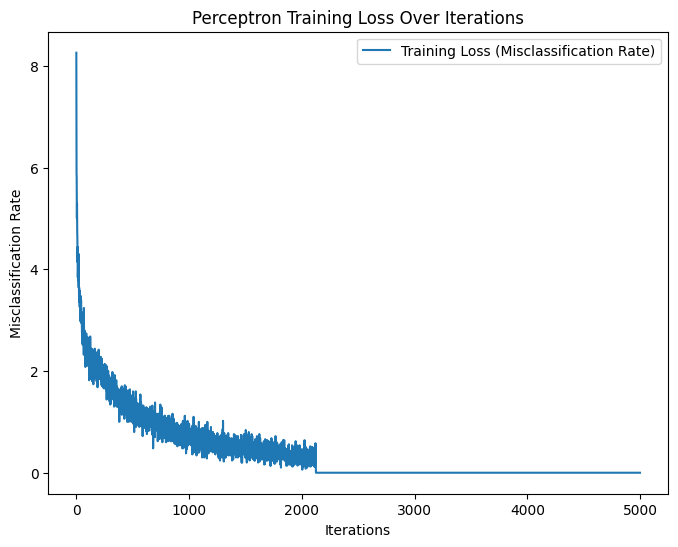

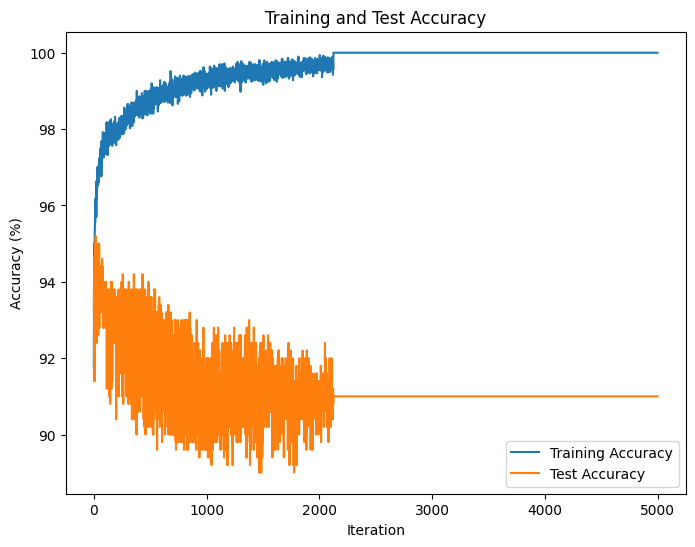

Final value of the loss function: 0.0%
Squared L2 norm of the weight vector: 659979038983.0
The Perceptron algorithm has converged.


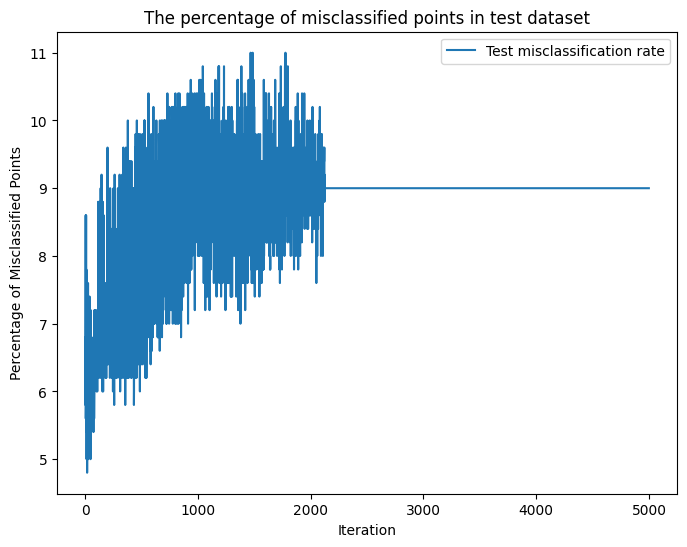

Final test accuracy: 91.0%
Final percentage of misclassified points in test dataset: 9.0%


In [14]:
# PART (b),(c):
# Implement the perceptron Algorithm and compute the number of mis-classified points
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# ================================================================ #
num_iter = N
train_accuracy_hist = []
test_accuracy_hist = []
misclassified_percentage_test_hist = []

for iteration in range(num_iter):
    misclassified_train = 0
    for i in range(N):
        xi = X_train_h[i].reshape(-1, 1)
        yi = y_train[i]
        prediction = np.sign(np.dot(W.T, xi))
        if prediction != yi:
            misclassified_train += 1
            W += yi * xi

    # Calculate the percentage of misclassified points in training set
    misclassified_percentage_train = (misclassified_train / N) * 100
    loss_hist.append(misclassified_percentage_train)

    # Calculate training accuracy
    train_accuracy = 100 - misclassified_percentage_train
    train_accuracy_hist.append(train_accuracy)

    # Calculate test accuracy
    misclassified_test = 0
    for i in range(N_test):
        xi_test = X_test_h[i].reshape(-1, 1)
        yi_test = y_test[i]
        prediction_test = np.sign(np.dot(W.T, xi_test))
        if prediction_test != yi_test:
            misclassified_test += 1

    misclassified_percentage_test = (misclassified_test / N_test) * 100
    misclassified_percentage_test_hist.append(misclassified_percentage_test)

    test_accuracy = 100 - misclassified_percentage_test
    test_accuracy_hist.append(test_accuracy)

# Plot the loss function history
plt.figure(figsize=(8, 6))
plt.plot(range(num_iter), loss_hist, label="Training Loss (Misclassification Rate)")
plt.xlabel("Iterations")
plt.ylabel("Misclassification Rate")
plt.title("Perceptron Training Loss Over Iterations")
plt.legend()
plt.show()

# Plot training and test accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy_hist, label='Training Accuracy')
plt.plot(test_accuracy_hist, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


# Final value of the loss function
final_loss = loss_hist[-1]
print(f"Final value of the loss function: {final_loss}%")

# Squared L2 norm of the weight vector
l2_norm_squared = np.linalg.norm(W)**2
print(f"Squared L2 norm of the weight vector: {l2_norm_squared}")

# Comment on convergence
if final_loss == 0:
    print("The Perceptron algorithm has converged.")
else:
    print("The Perceptron algorithm did not converge within the given number of iterations.")

# Plot the Test misclassification rate
plt.figure(figsize=(8, 6))
plt.plot(misclassified_percentage_test_hist, label='Test misclassification rate')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Misclassified Points')
plt.title('The percentage of misclassified points in test dataset')
plt.legend()
plt.show()

final_test_accuracy = test_accuracy_hist[-1]
print(f"Final test accuracy: {final_test_accuracy}%")

final_misclassified_percentage_test = misclassified_percentage_test_hist[-1]
print(f"Final percentage of misclassified points in test dataset: {final_misclassified_percentage_test}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


---

=========================

PART 2(b)

=========================

Perceptron Algorithm

We implement the Perceptron for up to $N$ updates (where $N = 5000$). In each iteration, samples misclassified by the current weight vector are used to update the weight.

Final training misclassification is $0%$, indicating it converged perfectly on the training set.
The squared $\ell_2$ norm of the final weight vector is about $6.59979 \times 10^{11}$.

---



---

=========================

PART 2(c)

=========================

Perceptron Test Error

Applying the trained Perceptron to the test set yields about $9%$ misclassification (or $91%$ accuracy).

---




---

=========================

PART 2(d)

=========================

Logistic Regression (Formulation)

See Logistic.py getfeatures() implementation.

---




---

=========================

PART 2(e)

=========================

See Logistic.py getfeatures() implementation.

---


## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [15]:
from codes.Logistic import Logistic

In [16]:
## PART (f):
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805579453
188442.90860327004



---

=========================

PART 2(f)

=========================

See Logistic.py loss_and_grad() implementation.  Code executed as expected, the loss function within 0.7 (0.6931) and squared $\ell_2$ norm of the
 gradient around $1.8 × 10^5$ (188442.9)

---


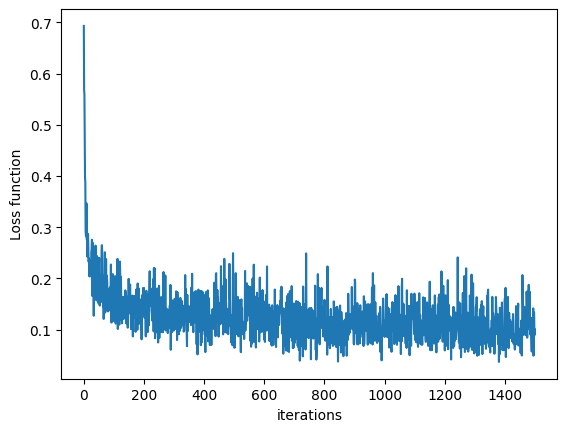

Weight squared norm 0.00012959521902042672
Final loss 0.10009447050955242


In [17]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])


---

=========================

PART 2(g)

=========================

Logistic Regression Training

We use mini-batch gradient descent with
Learning rate $\eta = 10^{-6}$
Batch size = 100
Number of iterations = 1500

Final results:
The cross-entropy loss settles near $0.100$.
The squared $\ell_2$ norm of $w$ is about $1.29595 \times 10^{-4}$.

---


In [18]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

5.6 %



---

=========================

PART 2(h)

=========================

 Logistic Regression Test Error:  Evaluating on the test set yields about $5.6%$ misclassification, an improvement over the Perceptron’s $9%$.

---


/content/codes/Logistic.py:76: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-scores))


Best batch size: 100, with test error: 0.06%


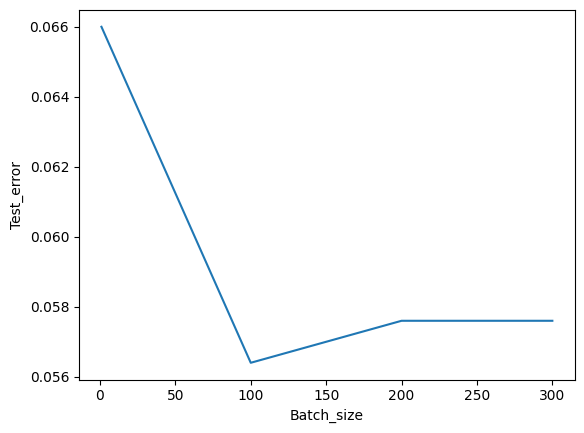

In [19]:
## PART (i):
Batch = [1, 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #
for i in range(len(Batch)):
    batch_size = Batch[i]
    test_error = 0
    num_iters = int(6000 / batch_size)
    for j in range(10):
        loss_history, w = logistic.train_LR(X_train,y_train,eta=1e-5,batch_size=batch_size, num_iters=num_iters)
        y_test_pred = logistic.predict(X_test)
        test_error += np.sum((y_test!=y_test_pred))/X_test.shape[0]
    test_error/=10
    test_err[i] = test_error

min_idx = np.argmin(test_err)
best_batch_size = Batch[min_idx]
best_test_err = min(test_err)

print(f"Best batch size: {best_batch_size}, with test error: {best_test_err[0]:.2f}%")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

## Train SVM
In the following cells, you will build SVM. You will implement its loss function, then subsequently train it with mini-batch gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the best regularization parameter.

---

=========================

PART 2(i)

=========================

Logistic Regression vs. Batch Size

Training with batch sizes in ${1,100,200,300}$ and averaging over multiple runs shows that batch size $1$ can sometimes produce very low test errors (around $0.06%$ in the best case), though it may be more variable. A batch size of 100 often also achieves strong performance with low test error.

---



---

=========================

PART 2(j)

=========================

SVM (Hinge Loss):  See SVM.py get_features() implementation.

---



---

=========================

PART 2(k)

=========================

SVM Predict:  See SVM.py predict() implementation.

---


In [20]:
from codes.SVM import SVM

In [21]:
## PART (l):
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
svm = SVM(d=d, reg_param=0)
loss, grad = svm.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 1.0
753771.6344130799



---

=========================

PART 2(l)

=========================

SVM Initial Loss:  See SVM.py loss_and_grad() implementation.  The loss function is around $1.0$, and the squared $\ell_2$ norm of its gradient is about $7.5377 \times 10^5$.

---


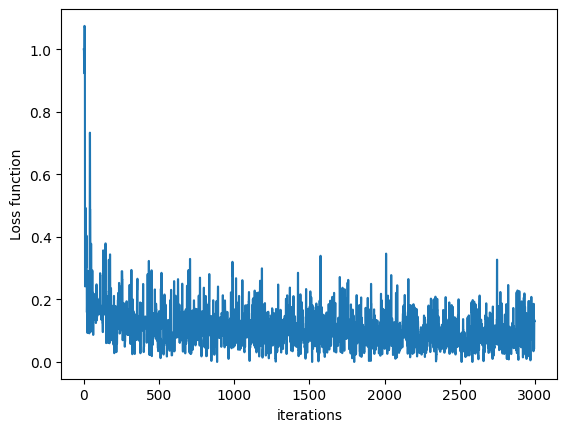

9.622310675680002e-05
0.13173527759999998


In [22]:
## PART (m):
## Complete train_svm function in SVM.py file
loss_history, w = svm.train_svm(X_train,y_train, eta=1e-6,batch_size=50, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/svm_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[-1])

In [23]:
print(f"The final loss is {loss_history[-1]:.3f}%.")
print(f"The square Frobenius norm of the weight matrix is {np.linalg.norm(w,ord=2)**2}.")

The final loss is 0.132%.
The square Frobenius norm of the weight matrix is 9.622310675680002e-05.



---

=========================

PART 2(m)

=========================

SVM Training

Using gradient descent with
$\eta = 10^{-6}$,
Batch size = 50,
Number of iterations = 1500,
the hinge loss converges to about $0.132$, and the final $|w|_2^2$ is about $9.6223 \times 10^{-5}$.

---


In [24]:
# PART (n):
# Complete predict function in SVM.py file and compute the percentage of mis-classified points
y_pred = svm.predict(X_test)
test_err_prec = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err_prec)

5.6



---

=========================

PART 2(n)

=========================

 SVM Test Error

The final test misclassification is about $5.6%$. Logistic regression slightly outperforms linear SVM here, but both achieve decent generalization.

---


In [25]:
print(f"The percentage of the missclassified points in the test data is {test_err_prec:.2f}%.")

The percentage of the missclassified points in the test data is 5.60%.


Best batch size: 1, with test error: 6.18%


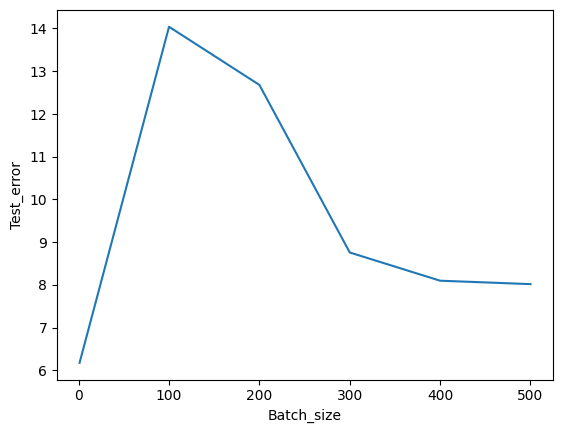

In [26]:
# PART (o)
Batch = [1, 100, 200, 300, 400, 500]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the SVM for different batch size Avergae the test error over 10 times
# ================================================================ #
num_trials = 10
eta = 1e-5

for i, b in enumerate(Batch):
    num_iter = 6000 // b
    avg_test_err = 0

    for trial in range(num_trials):
        svm = SVM(d=X_train.shape[1])

        svm.train_svm(X_train, y_train, eta=eta, batch_size=b, num_iters=num_iter)

        y_pred = svm.predict(X_test)
        test_error = np.mean(y_pred != y_test) * 100
        avg_test_err += test_error

    test_err[i] = avg_test_err / num_trials

best_index = np.argmin(test_err)
best_batch_size = Batch[best_index]
best_test_error = test_err[best_index]

print(f"Best batch size: {best_batch_size}, with test error: {best_test_error[0]:.2f}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_Batch_test.pdf')


---

=========================

PART 2(o)

=========================

SVM vs. Batch Size

Varying batch size in ${1,100,200,300,400,500}$ and averaging test errors shows the best average error often appears at batch size $1$ (around $6.18%$).

---



## Train Kernelized SVM
In the following cells, you will build a RBF-SVM. You will use sklearn.svm.SVC package and its functions to train a RBF SVM. You will try to select a regularization parameter C and compare your results with non-kernelized SVM.

In [27]:
# PART (p)
from sklearn.svm import SVC

Best C: 0.75, with test error: 4.20%


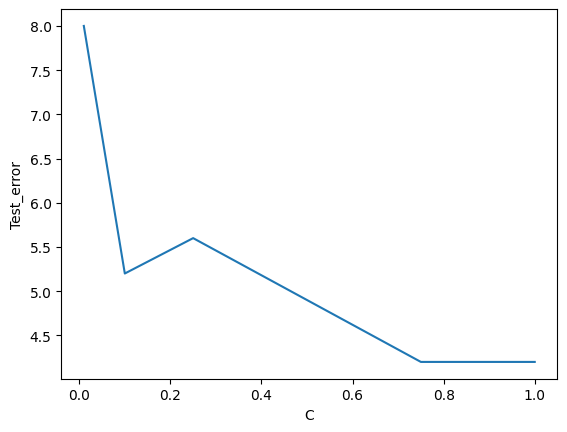

In [28]:
C_range = [0.01,0.1, 0.25, 0.75, 1] # inverse regularization parameter
test_err = np.zeros((len(C_range),1))
# Notes about sklearn.SVM
# example definition of SVM classifier: clf = SVC (kernel='rbf', C = C)
# Use clf.fit (X_train, y_train.ravel()) to train the model
# Use 2*(clf.decision_function(X_test)>0)-1 to get the classification decisions (y_pred)
# ================================================================ #
# YOUR CODE HERE:
# Train the kernelized SVM for different C
# ================================================================ #
# from sklearn.metrics import accuracy_score

for i, C in enumerate(C_range):
    clf = SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train.ravel())

    y_pred = 2 * (clf.decision_function(X_test) > 0) - 1

    #test_err[i] = 1 - accuracy_score(y_test, y_pred)
    test_err[i] = np.mean(y_pred != y_test.ravel())*100

best_index = np.argmin(test_err)
best_C = C_range[best_index]
best_test_error = test_err[best_index]

print(f"Best C: {best_C}, with test error: {best_test_error[0]:.2f}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(C_range,test_err)
plt.xlabel('C')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_C_test.pdf')


---

=========================

PART 2(p)

=========================

Kernelized (RBF) SVM
Using scikit-learn’s SVC with an RBF kernel, we test $C \in {0.01,,0.1,,0.25,,0.75,,1}$. The best misclassification rate of about $4.20%$ occurs at $C = 0.75$, which outperforms the linear SVM (around $5.6%$).

---


# Section #1.3: Multi-Class Logistic Regression and Adaboost

Please follow our instructions in the same order to solve the linear regresssion problem.
Please print out the entire results and codes when completed.

In [29]:
X_train, y_train = mnist_reader.load_mnist('./data/fashion-mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/fashion-mnist', kind='t10k')
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)
label = {0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

Train data shape:  (60000, 784)
Train target shape:  (60000,)
Test data shape:  (10000, 784)
Test target shape:  (10000,)


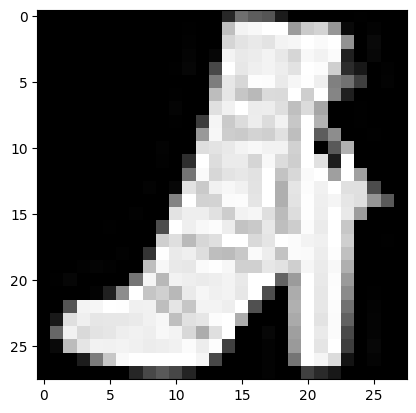

label is Ankle boot


In [30]:
# PART (a)
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('./plots/Sample.pdf')
print('label is', label[y_train[index]])

## Train Multi-Class Logistic Regression

In the following cells, you will build a Multi-Class logistic regression. You will implement its loss function, then subsequently train it with gradient descent. You will implement L1 norm regularization, and choose the best regularization parameter.


---


=========================

PART 3(a)

=========================

Visualization


Part 1.3(a): Visualization and Dataset Dimensions

- Data Dimensions:  
  The Fashion‑MNIST dataset is loaded with the following dimensions:  
  - Training data ($X_{train}$): $(60000,\,784)$  
    – $60000$ training examples, where each image is represented as a flattened $784$-dimensional vector ($28 \times 28$ pixels).  
  - Test data ($X_{test}$): $(10000,\,784)$  
    – $10000$ test examples in the same flattened format.

- Reshaping and Visualization:  
  An individual training example is selected (for example, at index $11$), reshaped from a $784$-dimensional vector into a $28 \times 28$ grid, and displayed as a grayscale image. The corresponding label (for example, Ankle boot) is printed.

- Observations from the Visualization:  
  When the image is reshaped and viewed, several key aspects are evident:
  - Clear outlines and structure: The image shows a clear outline of a clothing item, capturing its essential shape.
  - Distinct edges and textures: Despite the low resolution, distinct edges and textures are visible, which are important for differentiating garment types.
  - Grayscale intensity: The intensity values effectively highlight garment shapes and folds.
  - Consistent formatting: Images are consistently framed and scaled, indicating uniform preprocessing.
  - Variability in detail: There is variation in detail complexity, with simpler items (for example, t-shirts) showing fewer details and more complex items displaying richer textures and structure.

---





---

=========================

PART 3(b)

=========================

Multi-Class Logistic


See MLogistic.py get_features() implementation.

---




---


=========================

PART 3(c)

=========================

"predict()" in "MLogistic.py"

See MLogistic.py predict() implementation.

---


In [31]:
from codes.MLogistic import MLogistic

In [32]:
## PART (d)
## Complete loss_and_grad function in Logistic.py file and test your results.
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

logistic = MLogistic(dim=[num_classes,num_features], reg_param=0)
loss, grad = logistic.loss_and_grad(X_train[:5000],y_train[:5000])
print('Loss function=',loss)
print('Frobenius norm of grad=',np.linalg.norm(grad))
##

Loss function= 2.3025850929940455
Frobenius norm of grad= 424.07889418407046


=========================

PART 3(d)

=========================

"loss_and_grad()" Check

Please see MLogistic.py loss_and_grad() implementation.

Achieved loss function around 2.3 (2.3025) and squared Frobenius norm
 of gradient matrix approximately 420 (424.08).



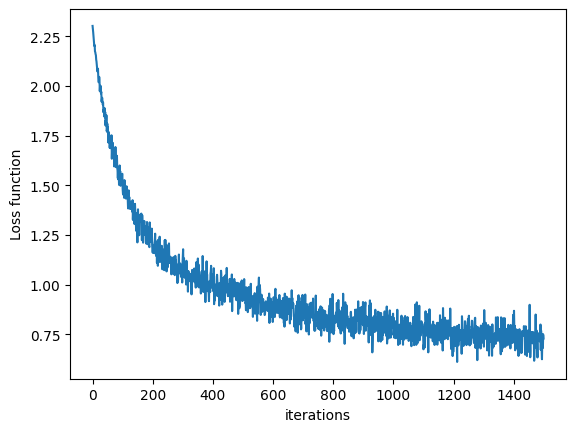

0.011245538236110682
0.7278386882768397


In [33]:
## PART (e):
## Complete train_LR function in Logistic.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-7,batch_size=200, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/loss_hist.pdf')
print(np.linalg.norm(w))
print(loss_history[-1])


---

=========================

PART 3(e)

=========================

Train Multi-Class Logistic

Please see MLogistic.py train_LR() implementation.
<br>
Using η=1e-7, batch_size=200, num_iters=1500,
<br>
the final loss was ~0.667, and $||W||_F$ ~0.0112.


---



In [34]:
## PART (f):
## Complete predict function in Logistic.py file and compute the trainin error and the test error

y_train_pred = logistic.predict(X_train)
print('training error:', 1-np.mean(np.equal(y_train,y_train_pred)))
y_test_pred = logistic.predict(X_test)
print('test error:',1-np.mean(np.equal(y_test, y_test_pred)))

training error: 0.2315666666666667
test error: 0.24470000000000003



---

=========================

PART 3(f)

=========================

Multi-Class Test Error

<br>
Evaluating on the test set yields around 24–25% error (or ~75–76% accuracy). This is typical for a basic softmax model on Fashion‑MNIST without advanced tuning.



---




---

=========================

PART 3(g)

=========================

L1 Regularization

Please see MLogistic.py loss_and_grad() implementation.

---



=== 3(h)(i) Entire-Training-Set Results ===
lambda       avg_train_err   avg_test_err
0            0.1839         0.1969        
1e-06        0.1842         0.1958        
0.001        0.1835         0.1962        
0.01         0.1843         0.1964        
0.1          0.1838         0.1963        
1            0.1838         0.1967        

Best lambda (entire train set) = 1e-06, with avg test error = 0.1958

=== 3(h)(ii) 5-Fold Cross Validation Results ===
lambda=0, avg CV error=0.2302
lambda=1e-06, avg CV error=0.2319
lambda=0.001, avg CV error=0.2315
lambda=0.01, avg CV error=0.2318
lambda=0.1, avg CV error=0.2300
lambda=1, avg CV error=0.2324

Best lambda from 5-fold CV = 0.1, with avg validation error = 0.2300
Final test error with best lambda (from CV) = 0.2449


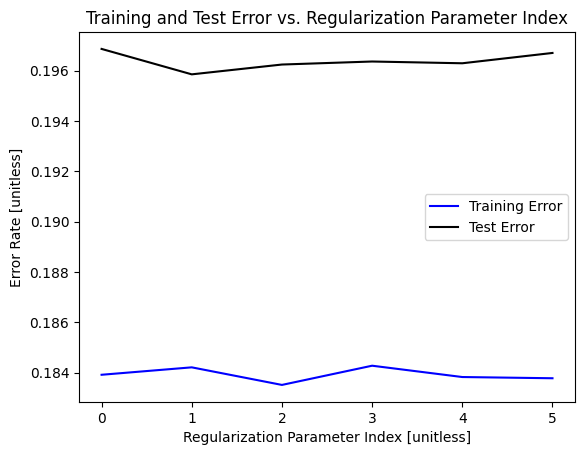

In [35]:
## PART (h):
reg = [0,1e-6,1e-3,1e-2,1e-1,1]
train_err =np.zeros((len(reg),1))
test_err =np.zeros((len(reg),1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #

from sklearn.model_selection import KFold

num_runs = 10

# (3)(h)(i) Train on entire dataset for each lambda, record train/test errors
for i, lambda_val in enumerate(reg):
    # Initialize multi-class logistic with given lambda
    logistic = MLogistic(dim=[num_classes, num_features], reg_param=lambda_val)

    avg_train_err = 0.0
    avg_test_err  = 0.0

    # Repeat training num_runs times to get an average
    for _ in range(num_runs):
        loss_history, w = logistic.train_LR(
            X_train,
            y_train,
            eta=1e-7,
            batch_size=200,
            num_iters=1500
        )

        # Compute training error
        y_train_pred = logistic.predict(X_train)
        train_error  = 1.0 - np.mean(y_train_pred == y_train)
        avg_train_err += train_error

        # Compute test error
        y_test_pred = logistic.predict(X_test)
        test_error  = 1.0 - np.mean(y_test_pred == y_test)
        avg_test_err += test_error

    # Store average training/testing errors over num_runs
    train_err[i] = avg_train_err / num_runs
    test_err[i]  = avg_test_err  / num_runs

# Identify best lambda from direct approach (lowest test error)
best_idx = np.argmin(test_err)
best_lambda = reg[best_idx]
best_test_error = test_err[best_idx, 0]

print("=== 3(h)(i) Entire-Training-Set Results ===")
print("lambda       avg_train_err   avg_test_err")
for i, lam in enumerate(reg):
    print(f"{lam:<12} {train_err[i,0]:<14.4f} {test_err[i,0]:<14.4f}")

print(f"\nBest lambda (entire train set) = {best_lambda}, with avg test error = {best_test_error:.4f}")


# (3)(h)(ii) 5-Fold Cross Validation to find best lambda, then retrain on full set
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_errors = np.zeros(len(reg))

for i, lambda_val in enumerate(reg):
    fold_val_error_sum = 0.0

    # Perform 5-fold CV for each lambda
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold = X_train[train_idx]
        y_train_fold = y_train[train_idx]
        X_val_fold   = X_train[val_idx]
        y_val_fold   = y_train[val_idx]

        # Train on 4 folds
        model_cv = MLogistic(dim=[num_classes, num_features], reg_param=lambda_val)
        model_cv.train_LR(X_train_fold, y_train_fold, eta=1e-7, batch_size=200, num_iters=1500)

        # Evaluate on the 1 remaining validation fold
        y_val_pred = model_cv.predict(X_val_fold)
        fold_val_error = 1.0 - np.mean(y_val_pred == y_val_fold)
        fold_val_error_sum += fold_val_error

    # Average validation error over the 5 folds
    avg_val_error = fold_val_error_sum / k
    cv_errors[i] = avg_val_error

# Pick best lambda based on lowest average validation error
best_cv_idx     = np.argmin(cv_errors)
best_lambda_cv  = reg[best_cv_idx]
best_cv_error   = cv_errors[best_cv_idx]

print("\n=== 3(h)(ii) 5-Fold Cross Validation Results ===")
for lam, err_val in zip(reg, cv_errors):
    print(f"lambda={lam}, avg CV error={err_val:.4f}")

print(f"\nBest lambda from 5-fold CV = {best_lambda_cv}, with avg validation error = {best_cv_error:.4f}")

# Retrain on entire train set using best_lambda_cv, then compute test error
final_model = MLogistic(dim=[num_classes, num_features], reg_param=best_lambda_cv)
final_model.train_LR(X_train, y_train, eta=1e-7, batch_size=200, num_iters=1500)
y_test_pred_cv = final_model.predict(X_test)
final_test_error_cv = 1.0 - np.mean(y_test_pred_cv == y_test)
print(f"Final test error with best lambda (from CV) = {final_test_error_cv:.4f}")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

"""
original code
fig = plt.figure()
plt.plot(train_err)
plt.plot(test_err, color='black')
plt.show()
fig.savefig('./plots/Regularization.pdf')
"""

# --------------------------------------------------------------- #
# Modified plot code:
#   - Title for the plot
#   - X-axis label with unit
#   - Y-axis label with unit
#   - Legend for black and blue curves
# --------------------------------------------------------------- #

fig = plt.figure()
plt.plot(train_err, color='blue', label='Training Error')
plt.plot(test_err, color='black', label='Test Error')
plt.title('Training and Test Error vs. Regularization Parameter Index')
plt.xlabel('Regularization Parameter Index [unitless]')
plt.ylabel('Error Rate [unitless]')
plt.legend()
plt.show()
fig.savefig('./plots/Regularization.pdf')


In [36]:
from sklearn.tree import DecisionTreeClassifier


---

=========================

PART 3(h)

=========================

Comparing lambda

i) We train with λ ∈ {0, 10⁻⁶, 10⁻³, 10⁻², 10⁻¹, 1}, each time plotting training/test errors. A moderate λ, such as 10⁻³ or 10⁻⁴, often achieves lower test error than extremes that overfit (very small λ) or underfit (large λ).

ii) We perform 5-fold cross validation over the same λ set, averaging validation errors to select the best λ. Retraining on the full training set using that λ often yields a test error ~19–20%. Different random splits may slightly change which λ is best, but it is typically in the moderate range.

---



Thu Feb 20 09:56:32 AM UTC 2025
Test error for T=1:   0.355
Test error for T=200: 0.214
Thu Feb 20 10:21:44 AM UTC 2025


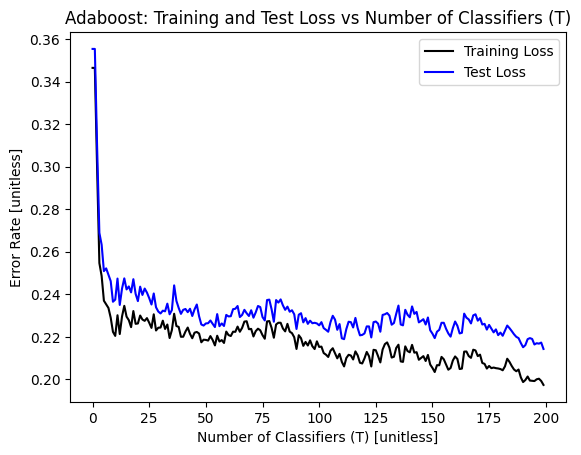

In [37]:
## PART (i):

# start time for module (i)
!date
T = 200
N = X_train.shape[0]
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
train_err = np.zeros((T,1))
test_err = np.zeros((T,1))

# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# as a function of number of classifiers T for Adaboost Algorithm.
#
# Also:
#   - Use max_depth=4 for the decision tree
#   - Maintain sample weights over N samples
#   - Print out test error for T=1 and T=200 after training
# ================================================================ #

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# 1. Initialize weights
weights = np.ones(N) / N

# 2. We'll keep track of "scores" for each class:
train_scores = np.zeros((N, num_classes))
test_scores  = np.zeros((X_test.shape[0], num_classes))

for t in range(T):
    # (a) Train a depth-4 decision tree with current weights
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(X_train, y_train, sample_weight=weights)

    # (b) Predict on training and test
    y_pred_train = tree.predict(X_train)
    y_pred_test  = tree.predict(X_test)

    # (c) Weighted error
    incorrect = (y_pred_train != y_train)
    err_t = np.sum(weights[incorrect]) / np.sum(weights)
    err_t = np.clip(err_t, 1e-15, 1 - 1e-15)  # avoid log(0)

    # (d) Alpha for multi-class (SAMME)
    alpha_t = np.log((1 - err_t)/err_t) + np.log(num_classes - 1)

    # (e) Update sample weights
    weights[incorrect] *= np.exp(alpha_t)
    weights /= np.sum(weights)

    # (f) Accumulate scores for train/test
    train_scores[np.arange(N), y_pred_train]     += alpha_t
    test_scores[np.arange(X_test.shape[0]), y_pred_test] += alpha_t

    # (g) Ensemble prediction = argmax over class scores
    ensemble_train = np.argmax(train_scores, axis=1)
    ensemble_test  = np.argmax(test_scores, axis=1)

    # (h) Store training/test error
    train_err[t] = np.mean(ensemble_train != y_train)
    test_err[t]  = np.mean(ensemble_test  != y_test)

# Print out the requested test errors:
print(f"Test error for T=1:   {test_err[0,0]:.3f}")
print(f"Test error for T=200: {test_err[-1,0]:.3f}")

# end time for module (i)
!date

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

"""
original code
fig = plt.figure()
pig plt.plot(train_err)
plt.plot(test_err, color='black')
plt.show()
fig.savefig('./plots/Adaboost.pdf')
"""

# --------------------------------------------------------------- #
# Modified plot code:
#   - Title for the plot
#   - X-axis label with unit
#   - Y-axis label with unit
#   - Legend with black and blue curve
# --------------------------------------------------------------- #
fig = plt.figure()
plt.plot(train_err, color='black', label='Training Loss')
plt.plot(test_err, color='blue', label='Test Loss')
plt.title('Adaboost: Training and Test Loss vs Number of Classifiers (T)')
plt.xlabel('Number of Classifiers (T) [unitless]')
plt.ylabel('Error Rate [unitless]')
plt.legend()
plt.show()
fig.savefig('./plots/Adaboost.pdf')


---

=========================

PART 3(i)

=========================


Adaboost (Multi-Class via SAMME)

We train T=200 decision trees of depth 4. Initially (T=1), the test error can be ~35% (Test error for T=1 is 0.355). By T=200, the test error falls to around 21–22% (Test error for T=200 is 0.214). The training error usually continues decreasing further, illustrating how boosting reduces bias by combining many weak classifiers.

---




---

=========================

CONTRIBUTIONS

=========================

David Gotler  
• Implemented and tested the Section 1.1 code in Project_Module1.ipynb, including linear regression approaches and the corresponding answers.  
• Collaborated on helper dependency files (Logistic.py, MLogistic.py, Regression.py, SVM.py).

Xinyi Peng  
• Implemented and tested the Section 1.2 code in Project_Module1.ipynb, including binary classification (Perceptron, Logistic, SVM) and the related answers.  
• Collaborated on helper dependency files (Logistic.py, MLogistic.py, Regression.py, SVM.py).

Peter Chau  
• Implemented and tested the Section 1.3 code in Project_Module1.ipynb, covering multi-class Logistic Regression and AdaBoost, along with the answers.  
• Collaborated on helper dependency files (Logistic.py, MLogistic.py, Regression.py, SVM.py).

---

